# **Prédire si le revenu dépasse ou non 50 000 $/an sur la base des données du recensement**

Dans ce contexte, la prédiction de savoir si un individu a un revenu annuel supérieur à 50 000 dollars à partir des données du recensement est un sujet intéressant et important. Les données du recensement comprennent des informations démographiques et économiques sur des individus, ce qui en fait une source de données précieuse pour prédire les revenus. L'idée est d'utiliser des techniques de modélisation statistique et de machine learning pour extraire des informations à partir de ces données et construire des modèles prédictifs. Cependant, la prédiction des revenus n'est pas une tâche facile car elle peut être influencée par de nombreux facteurs tels que l'éducation, l'expérience professionnelle, le sexe, l'âge et le lieu de résidence. Par conséquent, les modèles prédictifs doivent être conçus avec soin pour prendre en compte ces facteurs et obtenir des résultats précis et fiables. Nous allons examiner différents algorithmes de prédiction sur notre jeu de données en les comparant pour retenir celui qui nous donne la meilleure prédiction. Nous disposons d'une base de donnée avec 15 attributs, 6 numériques et 9 catégoriels.

**Listes des attributs:**
- Income : >50K, <=50K.
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----

## Import Libraries and Define Auxiliary Functions

In [148]:
# import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import itertools
%matplotlib inline 
import matplotlib.pyplot as plt

Nous chargeons notre base de donnée avec pandas.
On remarque que notre base de donnée ne dispose pas d'entête. Nous créons un vecteur <code>names</code> afin d'ajouter le nom des colonnes à la base de donnée. 

In [149]:
df = pd.read_csv('../adult.data', names=['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 
                                 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 
                                 'hours_per_week', 'native_country', 'income'], sep=', ', engine="python")
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Exploration et Préparation des données

Nous identifions et calculons le pourcentage des valeurs manquantes dans chaque attribut

In [150]:
df.isnull().sum()/df.count()*100

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education_num     0.0
marital_status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital_gain      0.0
capital_loss      0.0
hours_per_week    0.0
native_country    0.0
income            0.0
dtype: float64

On peut visualiser les données manquantes à l'aide d'un graphique de type <code>heatmap</code>. Ce graphique affiche les valeurs manquantes en jaune et les valeurs présentes en vert. Les colonnes ayant le plus de valeurs manquantes sont facilement identifiables par les bandes jaunes dans le graphique. <code>Viridis</code> est une palette de couleurs prédéfinie de Matplotlib qui utilise des couleurs vives et des transitions de couleurs douces pour une meilleure lisibilité des données.

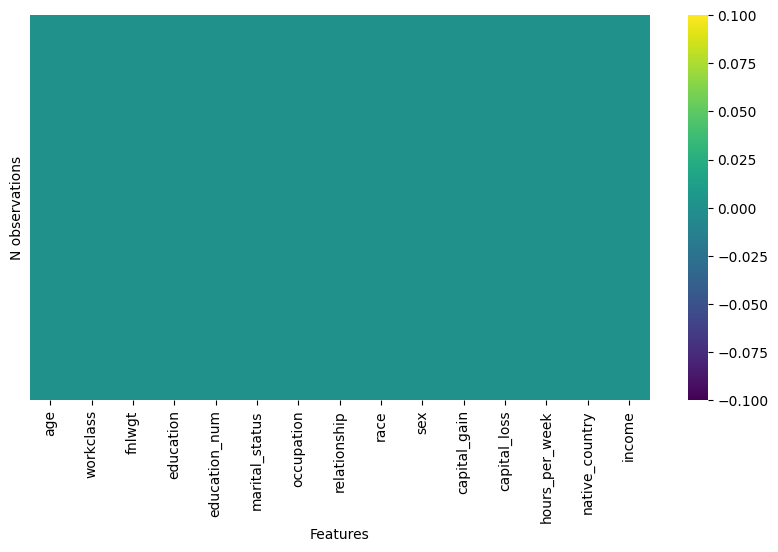

In [151]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), yticklabels=False, cmap="viridis")
plt.ylabel("N observations")
plt.xlabel("Features")
plt.show()

Nous identifions les colonnes numériques et catégorielles

In [152]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

### Statistiques descriptives

In [153]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Analyse Univariée

Cette analyse se fera uniquement sur les varables quantitatif. Pour cela, on va recuperer les variables quantitatif de notre dataset.

In [154]:
var_quant = df.select_dtypes(include="int64").columns.to_list()

In [155]:
# Fonction pour générer les graphiques
def analyse_univarie(variables, color='orange'):
    plt.figure(figsize=(8,6))
    sns.histplot(x=variables, data=df, color=color)
    plt.xlabel(variables)
    plt.ylabel("Count")
    plt.title("Histogram of "+ variables)
    plt.show()

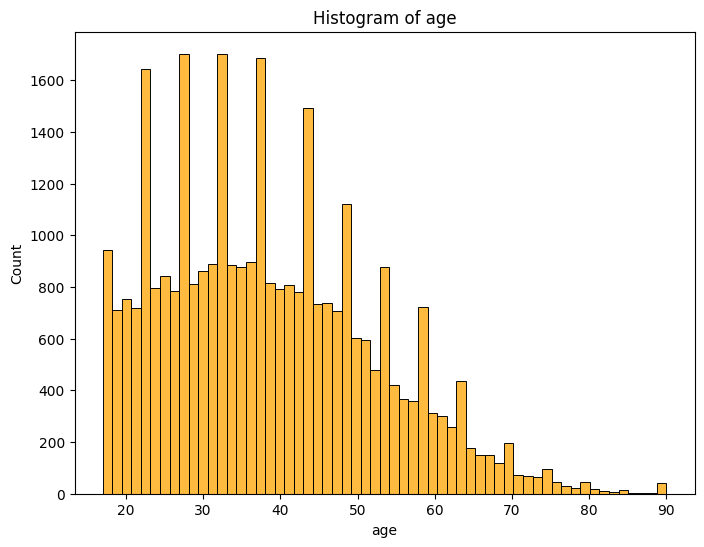

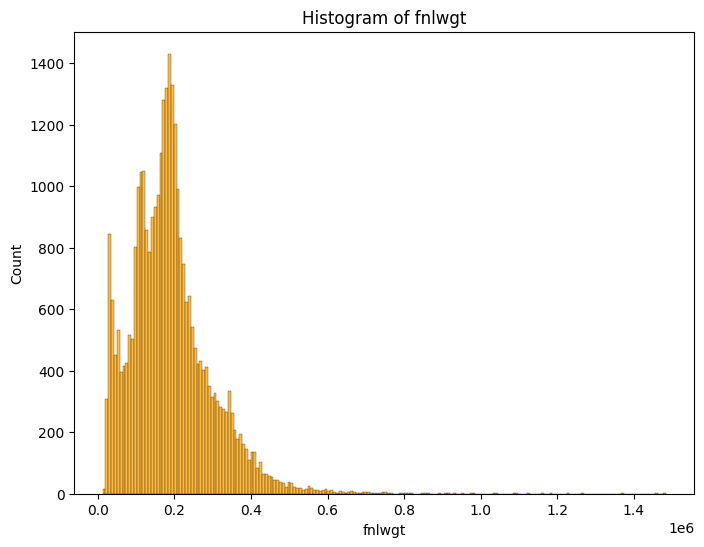

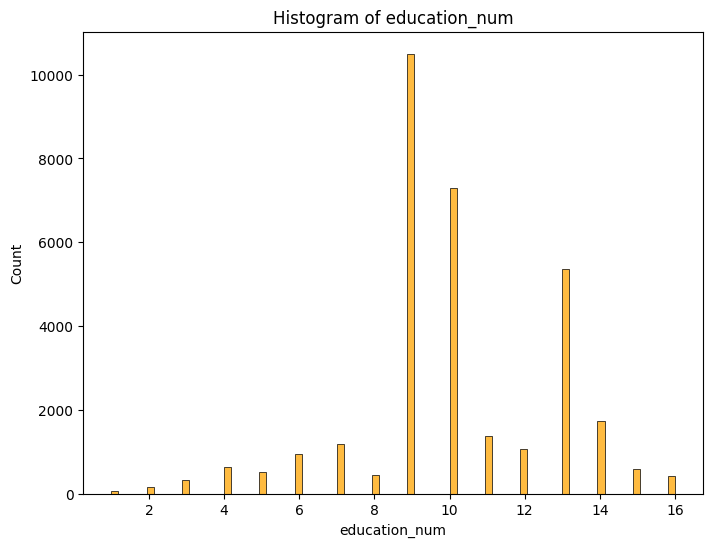

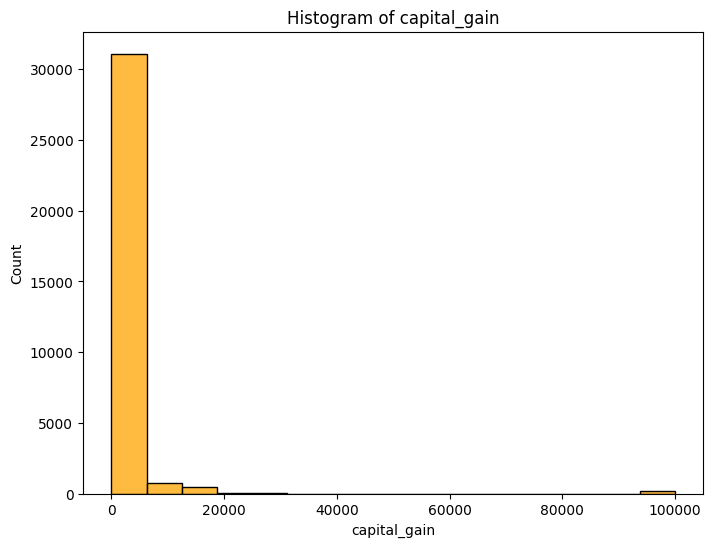

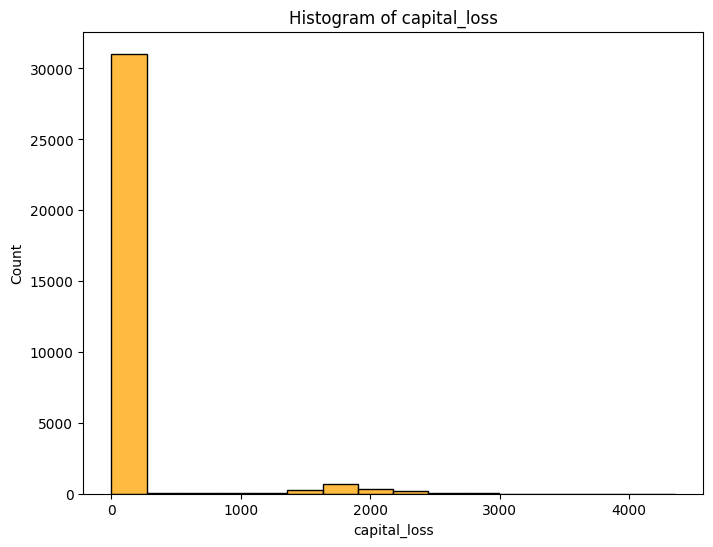

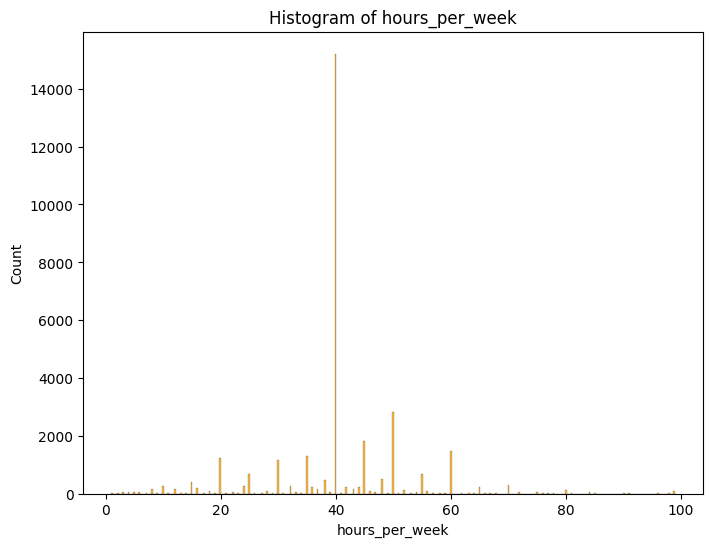

In [156]:
for var in var_quant:
    analyse_univarie(variables=var)

## Analyse Multivariée

<Figure size 1000x500 with 0 Axes>

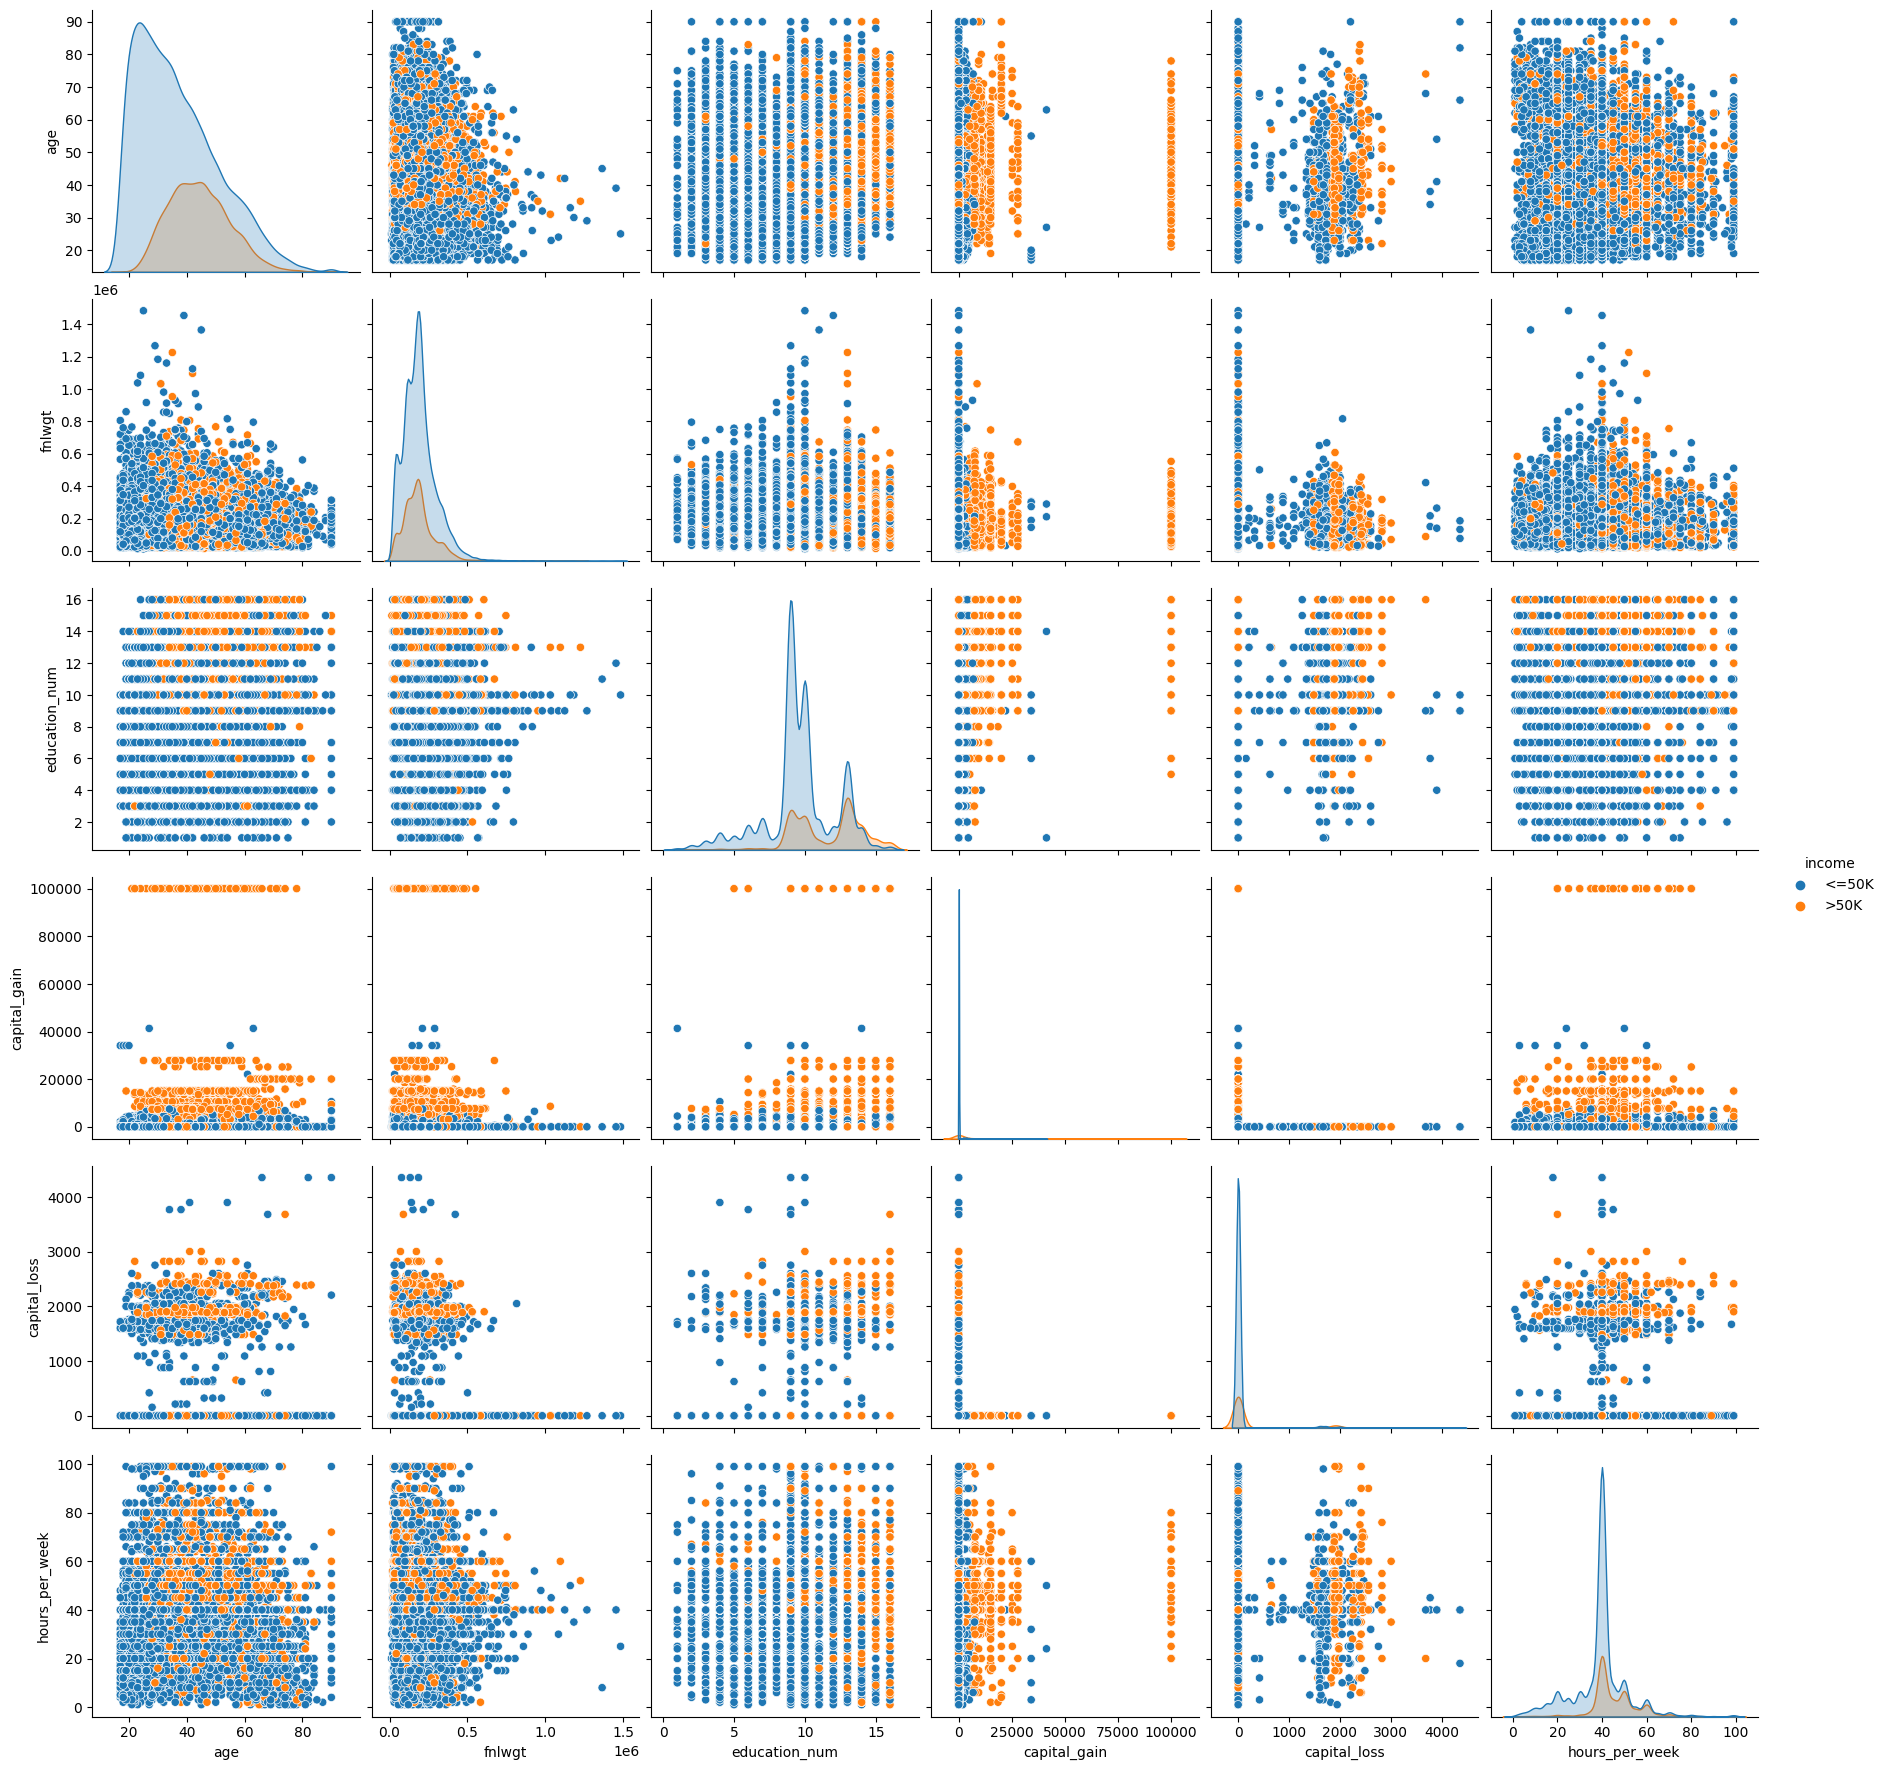

In [157]:
fig = plt.figure(figsize=(10,5))
sns.pairplot(df, hue='income', height=3)
plt.show()

On a constaté qu'il y'a deux variables éducations, l'une catégorielle et l'autre entier. Pour la suite de nos analyses, nous supprimons la variable education.

In [158]:
unique_values = df[['education', 'education_num']].drop_duplicates()
unique_values

,education,education_num
0,Bachelors,13
2,HS-grad,9
3,11th,7
5,Masters,14
6,9th,5
10,Some-college,10
13,Assoc-acdm,12
14,Assoc-voc,11
15,7th-8th,4
20,Doctorate,16


Ainsi on peut supprimer la variable education. Pour cela nous utilisons la méthode <code>drop()</code> avec l'argument <code>axis=1</code> pour spécifier que nous supprimons une colonne.

In [159]:
df.drop('education', inplace=True, axis=1)
df.columns.tolist()

['age',
 'workclass',
 'fnlwgt',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income']

Nous utilisons la méthode <code>value_counts()</code> sur la colonne <code>income</code> pour déterminer le nombre de d'individus par catégorie de revenus.

In [160]:
# Apply value_counts on income column
df["income"].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

A présent nous faisons une analyse des données pour nos variables catégorielles. Nous utilisons la méthode <code>value_counts()</code> pour lister le nombre d'individus par modalité pour chaque variable

In [161]:
var_cat = df.select_dtypes(include="object").columns.to_list()
var_cat

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

### Workclass

In [162]:
df["workclass"].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

On voit qu'il y a une modalité <code>?</code> dans notre variable workclass. On suppose qu'elle correspond aux autres types de modalités non prise en compte dans la variable. Nous allons donc le renommer <code>Others</code>. Nous profitons pour le faire pour toutes les autres variables

In [163]:
columns = ['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']
for column in columns:
   df[column] = df[column].replace({'?': 'Others'})

df["workclass"].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Others               1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

On remarque que les modalités <code>Without-pay</code> et <code>Never-worked</code> de la variable workclass ont des effectifs très faible par rapport aux autres. Nous allons donc regrouper ces deux modalités dans la modalité <code>Others</code>  

In [164]:
df['workclass'] = df['workclass'].replace({'Without-pay': 'Others'}).replace({'Never-worked': 'Others'})
df["workclass"].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Others               1857
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Name: workclass, dtype: int64

### Marital_status

In [165]:
df["marital_status"].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

### Occupation

In [166]:
df["occupation"].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Others               1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

La variable <code>Others</code> dans <code>occupation</code> nous supposons qu'elle différente de la variable <code>Other-service</code>. Elle est répresente les autres types d'occupation non prise en compte par la variable alors que <code>Other-service</code> répresentation les autres types de services.

In [167]:
df['occupation'] = df['occupation'].replace({'Armed-Forces': 'Others'})
df["occupation"].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Others               1852
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Name: occupation, dtype: int64

### Relationship

In [168]:
df["relationship"].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

### Race

In [169]:
df["race"].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

### Sex

In [170]:
df["sex"].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

Native-country

In [171]:
df["native_country"].value_counts()

United-States                 29170
Mexico                          643
Others                          583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

Nous pouvons remarquer que notre ensemble de donnée contient des individus de 42 pays différents. Entrainez notre modèle sur ces données peut biaiser nos resultats. L'un des biais auxquels on peut faire face est : le <code>Biais géographique</code> c'est-à-dire les données peuvent être biaisées en fonction des pays, car les caractéristiques et les comportements des individus peuvent varier en fonction de la culture, de l'histoire, de l'environnement économique et politique, et d'autres facteurs liés au pays. Ce que nous pouvons pas contrôler avec notre ensemble de données. Pour cela nous allons regrouper notre ensemble de données en ceux catégories : les individus natifs des <code>Unites-States</code> car ils representent la majeur partie de nos données et non natifs des <code>Unites-States</code>. Ceci nous évite aussi d'avoir à faire un <code>One-hot encoding</code> d'une variable avec 42 modalités mais plutôt de le recoder 1 pour <code>Unites-States</code> et 0 pour les autres.

In [172]:
census_df = df.copy()
census_df.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [173]:
# n_country = 1 if United-States
# n_country = 0 otherwise
n_country = []
for element in census_df["native_country"]:
    if element == "United-States":
        n_country.append(1)
    else:
        n_country.append(0)


Cette variable <code>n_country</code> représente la classification des individus suivant leur pays d'origine. Il prend la valeur 1 lorsque l'individus est origninaire de Etats-Unis et 0 sinon

In [174]:
census_df['n_country']=n_country
census_df.drop('native_country', inplace=True, axis=1)
census_df.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income,n_country
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K,1
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K,1
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K,1
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K,1
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K,0


A présent nous encodons notre variable <code>target</code> c'est-à-dire la variable dépendante <code>income</code>. Elle prend la valeur 1 si le revenu est supérieur à 50K et 0 sinon. Pour ce faire, nous utilisons la méthode <code>get_dummies()</code> de pandas. 

In [175]:
income_dum = pd.get_dummies(census_df['income'], prefix='income', drop_first=True)
census_df['income_50K']=income_dum
census_df.drop('income', inplace=True, axis=1)
census_df.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,n_country,income_50K
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,1,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,1,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,1,0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,1,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,0,0


En examinant nos graphiques d'analyse univariée, nous avons remarqué que les variables <code>capital_loss</code> et <code>capital_gain</code> présentent une grande dispersion, avec des observations très élevées et d'autres plutôt fiables. En conséquence, nous avons décidé de les encoder sous forme de deux catégories distinctes. 1 si <code>capital_loss</code> / <code>capital_gain</code> et 0 sinon

In [176]:
census_df.loc[census_df['capital_loss']>0, 'capital_loss'] = 1
census_df.loc[census_df['capital_gain']>0, 'capital_gain'] = 1
census_df.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,n_country,income_50K
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,40,1,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,1,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,1,0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,1,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,0,0


Nous utilisons maintenant <code>get_dummies</code> sur notre dataframe pour appliquer le OneHotEncoder sur les colonnes <code>workclass</code>, <code>marital_status</code>, <code>occupation</code>, <code>relationship</code>, <code>race</code> et <code>sex</code>.

In [177]:
# HINT: Use get_dummies() function on the categorical columns

cols_dummies  = ["workclass", "marital_status", "occupation", "relationship", "race", "sex"]
census_df = pd.get_dummies(census_df, columns = cols_dummies, drop_first = True)
census_df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,n_country,income_50K,workclass_Local-gov,workclass_Others,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,39,77516,13,1,0,40,1,0,0,0,...,1,0,0,0,0,0,0,0,1,1
1,50,83311,13,0,0,13,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,38,215646,9,0,0,40,1,0,0,0,...,1,0,0,0,0,0,0,0,1,1
3,53,234721,7,0,0,40,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [178]:
census_df.isnull().sum()

age                                     0
fnlwgt                                  0
education_num                           0
capital_gain                            0
capital_loss                            0
hours_per_week                          0
n_country                               0
income_50K                              0
workclass_Local-gov                     0
workclass_Others                        0
workclass_Private                       0
workclass_Self-emp-inc                  0
workclass_Self-emp-not-inc              0
workclass_State-gov                     0
marital_status_Married-AF-spouse        0
marital_status_Married-civ-spouse       0
marital_status_Married-spouse-absent    0
marital_status_Never-married            0
marital_status_Separated                0
marital_status_Widowed                  0
occupation_Craft-repair                 0
occupation_Exec-managerial              0
occupation_Farming-fishing              0
occupation_Handlers-cleaners      

## Maintenant que nos données sont nettoyées et prêtes, nous allons pouvons definir notre variable explicatives et notre variable dépendantement

In [185]:
Y = census_df["income_50K"]
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: income_50K, dtype: uint8

In [186]:
X = census_df.loc[:, census_df.columns != 'income_50K']
X.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,n_country,workclass_Local-gov,workclass_Others,workclass_Private,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,39,77516,13,1,0,40,1,0,0,0,...,1,0,0,0,0,0,0,0,1,1
1,50,83311,13,0,0,13,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,38,215646,9,0,0,40,1,0,0,1,...,1,0,0,0,0,0,0,0,1,1
3,53,234721,7,0,0,40,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0


In [187]:
### Cast all numeric columns in X to `float64`
X = X.astype('float64', errors='ignore')
X.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,n_country,workclass_Local-gov,workclass_Others,workclass_Private,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,39.0,77516.0,13.0,1.0,0.0,40.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,50.0,83311.0,13.0,0.0,0.0,13.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,38.0,215646.0,9.0,0.0,0.0,40.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,53.0,234721.0,7.0,0.0,0.0,40.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,28.0,338409.0,13.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


Normalisons les données dans X puis les réaffecter à la variable <code>X</code> à l'aide de la transform.

In [188]:
transform = preprocessing.StandardScaler()
X = transform.fit(X).transform(X.astype(float))
X

array([[ 0.03067056, -1.06361075,  1.13473876, ..., -0.09161163,
         0.4130197 ,  0.70307135],
       [ 0.83710898, -1.008707  ,  1.13473876, ..., -0.09161163,
         0.4130197 ,  0.70307135],
       [-0.04264203,  0.2450785 , -0.42005962, ..., -0.09161163,
         0.4130197 ,  0.70307135],
       ...,
       [ 1.42360965, -0.35877741, -0.42005962, ..., -0.09161163,
         0.4130197 , -1.42233076],
       [-1.21564337,  0.11095988, -0.42005962, ..., -0.09161163,
         0.4130197 ,  0.70307135],
       [ 0.98373415,  0.92989258, -0.42005962, ..., -0.09161163,
         0.4130197 , -1.42233076]])

Diviser les données en ensembles de train et de test

In [190]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (22792, 42) (22792,)
Test set: (9769, 42) (9769,)


## Logistic Regression (LR)

In [192]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']}# l1 lasso l2 ridge
LR=LogisticRegression()
logreg_cv = GridSearchCV(estimator=LR, cv=10, param_grid=parameters)
logreg_cv.fit(X_train, Y_train)

C:\Users\segod\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\segod\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\segod\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\segod\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\segod\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\segod\

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag',
                                    'saga']})